In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from utils.connect  import connect
o = connect()

In [3]:
data = pd.read_table("./result/pagerank.txt")
hist_a = pd.read_table("./result/hits_a.txt")
hist_h = pd.read_table("./result/hits_h.txt")
data['h'] = hist_h['h']
data['a'] = hist_a['a']
data

,id,pagerank,h,a
0,50567111,1.714631e-06,4.376455e-06,1.175334e-06
1,8517910,1.999484e-06,0.000000e+00,7.507156e-08
2,61306948,7.992035e-08,4.133725e-09,0.000000e+00
3,60854565,7.992035e-08,4.688124e-10,0.000000e+00
4,57724193,7.992035e-08,4.808973e-11,0.000000e+00
...,...,...,...,...
3801770,90369758,7.992035e-08,1.935796e-11,0.000000e+00
3801771,72910664,7.992035e-08,1.935796e-11,0.000000e+00
3801772,72599709,7.992035e-08,1.935796e-11,0.000000e+00
3801773,34569793,7.992035e-08,1.935796e-11,0.000000e+00


In [4]:
data.iloc[:,1:].describe()

,pagerank,h,a
count,3.801775e+06,3.801775e+06,3.801775e+06
mean,2.630350e-07,2.630350e-07,2.630350e-07
std,1.035325e-05,9.151808e-07,3.098953e-06
min,7.992035e-08,-7.552653e-25,-1.900506e-22
25%,7.992035e-08,1.368570e-10,0.000000e+00
50%,7.992035e-08,8.886910e-09,0.000000e+00
75%,8.279140e-08,1.038977e-07,4.657859e-08
max,1.251692e-02,2.618888e-04,2.847239e-03


In [5]:
delta = 1

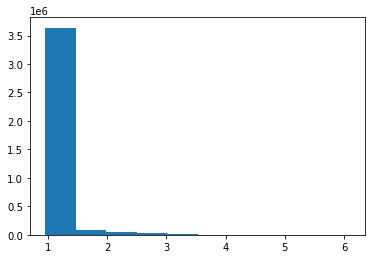

In [6]:
plt.hist(np.log10(data['pagerank']*10e7+delta))
plt.show()

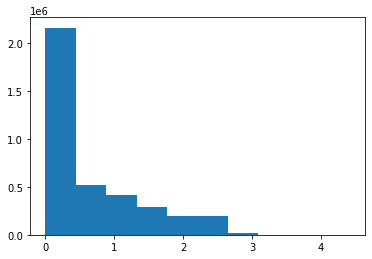

In [7]:
plt.hist(np.log10(data['h']*10e7+delta))
plt.show()

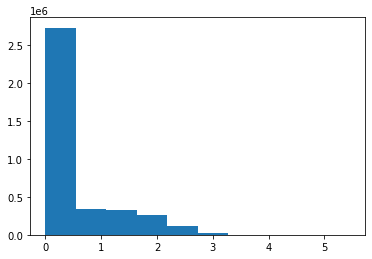

In [8]:
plt.hist(np.log10(data['a']*10e7+delta))
plt.show()

In [9]:
def mainpage(id):
    sql = "select login from ods_github_users where database_id = %s" % id
    with o.execute_sql(sql).open_reader() as reader:
        for record in reader:
            return "https://github.com/" + record.login

In [10]:
data.sort_values(by = 'pagerank').tail(5)

,id,pagerank,h,a
19052,810438,0.004137,4.104238e-06,0.001466
1807,499550,0.005089,8.645806e-06,0.001641
2613,905434,0.005173,0.000000e+00,0.001180
8096,66577,0.005820,3.916010e-07,0.000728
6200,1024025,0.012517,0.000000e+00,0.002847


In [11]:
for user_id in data.sort_values(by = 'pagerank').tail(5)['id']:
    print(user_id, end=" ")
    print(mainpage(user_id))

810438 https://github.com/gaearon
499550 https://github.com/yyx990803
905434 https://github.com/ruanyf
66577 https://github.com/JakeWharton
1024025 https://github.com/torvalds


In [12]:
for user_id in data.sort_values(by = 'h').tail(5)['id']:
    print(user_id, end=" ")
    print(mainpage(user_id))

18233711 https://github.com/justStarNew
14338588 https://github.com/AlexxNica
4624113 https://github.com/Magicianred
250445 https://github.com/batermj
14808551 https://github.com/Lisprez


In [13]:
for user_id in data.sort_values(by = 'a').tail(5)['id']:
    print(user_id, end=" ")
    print(mainpage(user_id))

170270 https://github.com/sindresorhus
905434 https://github.com/ruanyf
810438 https://github.com/gaearon
499550 https://github.com/yyx990803
1024025 https://github.com/torvalds
